# LightHearted AI <> UCL | Hackathon Helper Notebook

One in three of those reading this will die of a heart disease. So will one in three of those who don’t. Fortunately, heart diseases can be managed if detected early.

LightHearted AI is a medical device company dedicated to preventing 10 million heart-related deaths by 2030. Our laser-based novel medical device revolutionizes the detection of heart conditions, offering a faster, more accurate, and more affordable solution compared to existing techniques.



### Step1: Please run the cell below to load the dataset in your collab notebook

* This block will take sometime to run (1-2 mins)

* If you refresh the notebook you might have to run the block again

* You can also use the link below to download the dataset

* https://drive.google.com/file/d/1BNnXIC39cpD7DJQusdVWRI_tHguRzSzL/view?usp=drive_link





In [ ]:
import os

file_id = "1BNnXIC39cpD7DJQusdVWRI_tHguRzSzL"

if not os.path.exists("dataset.zip"):
    !gdown --id {file_id} --output dataset.zip

# Unzip
if not os.path.exists("dataset"):
    !unzip dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/PhyscioNet/training-b/b0355.hea  
  inflating: dataset/PhyscioNet/training-b/b0355.wav  
  inflating: dataset/PhyscioNet/training-b/b0356.hea  
  inflating: dataset/PhyscioNet/training-b/b0356.wav  
  inflating: dataset/PhyscioNet/training-b/b0357.hea  
  inflating: dataset/PhyscioNet/training-b/b0357.wav  
  inflating: dataset/PhyscioNet/training-b/b0358.hea  
  inflating: dataset/PhyscioNet/training-b/b0358.wav  
  inflating: dataset/PhyscioNet/training-b/b0359.hea  
  inflating: dataset/PhyscioNet/training-b/b0359.wav  
  inflating: dataset/PhyscioNet/training-b/b0360.hea  
  inflating: dataset/PhyscioNet/training-b/b0360.wav  
  inflating: dataset/PhyscioNet/training-b/b0361.hea  
  inflating: dataset/PhyscioNet/training-b/b0361.wav  
  inflating: dataset/PhyscioNet/training-b/b0362.hea  
  inflating: dataset/PhyscioNet/training-b/b0362.wav  
  inflating: dataset/PhyscioNet/training-b/b0363.hea  
  inflating: d

### Step2: Loading the dataset


* Dataset contains a index.csv file that contains the information like subject id, folder for that subject, diagnosis for that subject, gender, age etc

* The dataset contain multile folders each folder contains .wav file which can be loaded using the code below

In [ ]:
path = "/content/dataset/PhyscioNet/index.csv"

import pandas as pd

df = pd.read_csv(path)
df.head()

,Challenge record name,Database,Original record name,Diagnosis,Class (-1=normal 1=abnormal),# Beat (automated algorithm),# Beats requiring hand correction,Gender,Age (year),Height (m),...,# Recording in each subject,Transducer site on body,Recording state,Murmurs (2=None 3=Weak 4=Strong 6=Unclear),"Murmur Location (2=Sys,3=Dia,4=Both)",Arrhythmia (2=None 3=One arrhythmic beat 4=Medium Arrhytmia 5=Severe Arrhytmia 6=Unclear 7=Two arrhythmic beats),Respiration noise (2=None 3=Insignificant 4=Weak Resp. Noise<2 s 5=Weak Resp. Noise<3 s 6=Weak Resp. Noise <4 s 7=Weak Resp. Noise >4 s 8=Powerfull Resp. Noise<2 s 9=Powerfull Resp. Noise<3 s 10=Powerfull Resp. noise <4 s 11=Powerfull Resp. Noise >4 s 12=Dont know 13=Weak Resp. Noise<1 s 14=Resp. Noise<1 s 15=Powerfull Resp. noise <1 s 16=Weak Rec. Noise<1 s 17=Powerfull Rec. Noise<1 s),Ambient noise (2=None 3=Insignificant 4=Weak Rec. BG<2 s 5=Weak Rec. BG<3 s 6=Weak Rec. BG <4 s 7=Weak Rec. BG >4 s 8=BG. Noise<2 s 9=BG. Noise<3 s 10= BG. noise <4 s 11=BG. Noise >4 s 12=Powerfull BG. Noise<2 s 13=Powerfull BG. Noise<3 s 14=Powerfull BG. noise <4 s 15=Powerfull BG. Noise >4 s 16=Dont know 17=Weak BG. Noise<1 s 18=BG.Noise<1 s 19=Powerfull BG. Noise<1 s),Recording noise (2=None 3=Insignificant 4=Beg. Rec. Noise 5=End Rec. Noise 6=Beg-End Reco Noise 7=Weak Rec. Noise<2 s 8=Weak Rec. Noise<3 s 9=Weak Rec. Noise <4 s 10=Weak Rec. Noise >4 s 11=Powerfull Rec. Noise<2 s 12=Powerfull Rec. Noise<3 s 13=Powerfull Rec. noise <4 s 14=Powerfull Rec. Noise >4 s 15=Spikes 16=Dont know 17=Weak Rec. Noise<1 s 18=Powerfull Rec. Noise<1 s),Abdominal sounds (2=None 3=Insignificant 4=Sto. Noise<2 s 5=Sto. Noise<3 s 6=Sto. Noise <4 s 7=Sto. Noise >4 s 8=Dont know 9=Sto. Noise<1 s)
0,a0001,training-a,C45S1,MVP,1,36,0,NaN,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a0002,training-a,C19S3,MVP,1,27,7,NaN,NaN,NaN,...,NaN,Parasternum when sit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a0003,training-a,C23S0,MVP,1,25,0,NaN,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a0004,training-a,C35S18,Benign,1,35,0,NaN,NaN,NaN,...,NaN,Left of parasternum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a0005,training-a,C63S20,Benign,1,52,0,NaN,NaN,NaN,...,NaN,Parasternum when squat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step3: Load the wav file

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import wfdb
import os

# Assuming 'df' DataFrame from previous code is available and contains 'folder' column
# Replace '0' with the actual index of the row you want to access
folder_name = df['Database'][0]
file_path = os.path.join("/content/dataset/PhyscioNet", folder_name)

# Iterate through files in the folder and find the .wav file
for filename in os.listdir(file_path):
    if filename.endswith(".wav"):
        wav_file_path = os.path.join(file_path, filename)
        # Remove the extension for wfdb.rdsamp
        record_name = filename[:-4]
        signal,meta_data = wfdb.rdsamp(os.path.join(file_path, record_name))

In [ ]:
meta_data

{'fs': 2000,
 'sig_len': 61440,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['PCG', 'ECG'],
 'comments': ['Normal']}

In [ ]:
# Ths is how you extract the signal from the data
signal[:,0]

array([ 5550., 11583.,  9953., ...,  1648.,  1285.,  1208.])

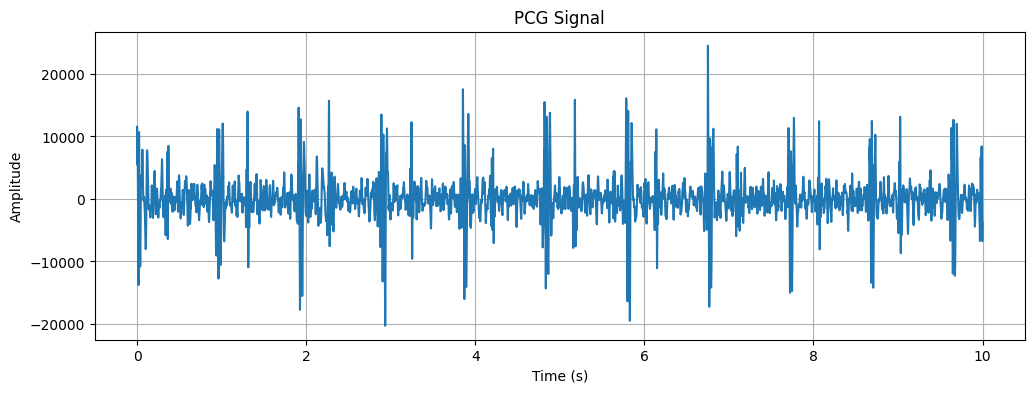

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pcg_signal(signal, sampling_frequency, duration=10):
    """
    Plots a PCG signal for a specified duration.

    Args:
        signal: The PCG signal data as a NumPy array.
        sampling_frequency: The sampling frequency of the signal.
        duration: The duration of the signal to plot in seconds (default: 10 seconds).
    """
    num_samples = int(duration * sampling_frequency)
    if num_samples > len(signal):
        num_samples = len(signal)  # Limit to the available data if needed

    time = np.arange(0, num_samples) / sampling_frequency
    plt.figure(figsize=(12, 4))
    plt.plot(time, signal[:num_samples])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("PCG Signal")
    plt.grid(True)
    plt.show()

# Example usage (assuming 'signal' and 'meta_data' from the provided code):
# Assuming 'fs' is the sampling frequency from meta_data
sampling_frequency = meta_data['fs']
plot_pcg_signal(signal[:,0], sampling_frequency) # Plot the first channel